In [165]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore') 


In [166]:
loan_df = pd.read_csv('credit_risk_dataset.csv')

In [167]:
loan_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [168]:
loan_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [169]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [170]:
loan_df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [171]:
# Set background and palette
sns.set(rc={"axes.facecolor": "#E0FFFF", "figure.facecolor": "#E0FFFF"})
custom_palette = ["#FF6347", "#32CD32", "#4169E1", "#FFD700", "#FF69B4", "#00FFFF"]
sns.set_palette(custom_palette)

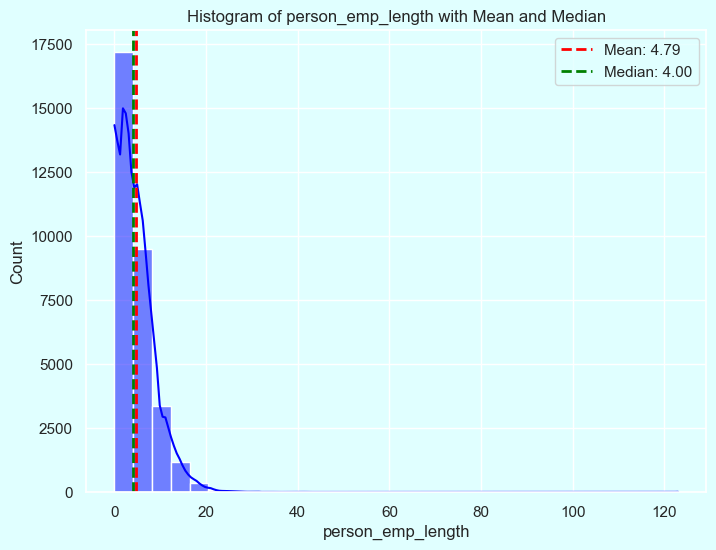

In [172]:

# Plot histogram for 'person_emp_length'
plt.figure(figsize=(8, 6))
sns.histplot(loan_df['person_emp_length'], bins=30, kde=True, color='blue')

# Add a vertical line for the mean
mean_value = loan_df['person_emp_length'].mean()
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')

# Add a vertical line for the median
median_value = loan_df['person_emp_length'].median()
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')

plt.title('Histogram of person_emp_length with Mean and Median')
plt.legend()
plt.show()


In [173]:
# filing using the median
loan_df['person_emp_length'].fillna(loan_df['person_emp_length'].median(), inplace=True)

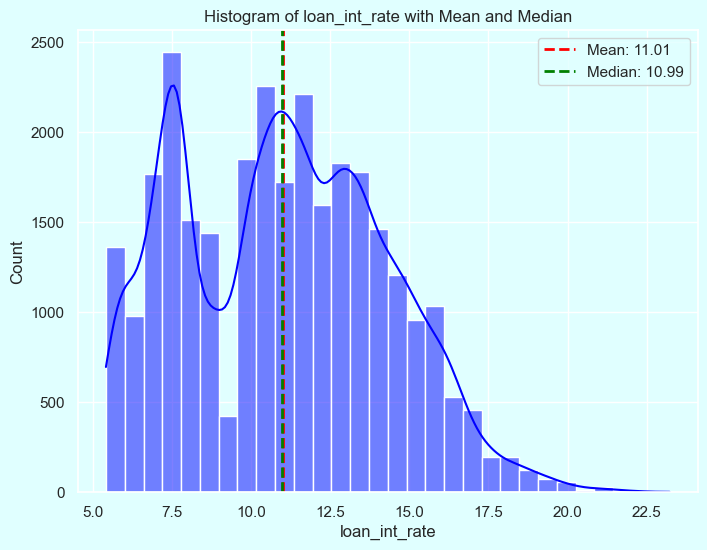

In [174]:
# Plot histogram for 'loan_int_rate'
plt.figure(figsize=(8, 6))
sns.histplot(loan_df['loan_int_rate'], bins=30, kde=True, color='blue')

# Add a vertical line for the mean
mean_value = loan_df['loan_int_rate'].mean()
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')

# Add a vertical line for the median
median_value = loan_df['loan_int_rate'].median()
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')

plt.title('Histogram of loan_int_rate with Mean and Median')
plt.legend()
plt.show()

In [175]:
# filing using the mean
loan_df['loan_int_rate'].fillna(loan_df['loan_int_rate'].mean(), inplace=True)

In [176]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [177]:
loan_df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

FEATURE ENGINEERING

In [178]:
min_loan_amnt = loan_df['loan_amnt'].min()

# Loan Amount Grouping
loan_df['loan_group'] = pd.cut(loan_df['loan_amnt'],
                            bins = [min_loan_amnt - 1, 5000, 10000, 15000, float('inf')],
                            labels = ['small', 'medium', 'large', 'very large'])


In [179]:
#Income grouping

loan_df['Income_range'] = pd.cut(loan_df['person_income'],
                              bins=[0, 25000, 50000, 75000, 100000, float('inf')],
                              labels=['low', 'low-middle', 'middle', 'high-middle', 'high'])

In [181]:
#MAX AND MIN AGE
max_ = loan_df['person_age'].max()
min_ = loan_df['person_age'].min()
print(f"maximum Age {max_}")
print(f"minimum Age {min_}")

# people with an age between x and y
def age_range(arr):
    lenarr = len(arr)
    for i in range(lenarr - 1):
        next_age = arr[i] + 1
        num_people = loan_df['person_age'].between(next_age, arr[i + 1]).sum()
        print(f'Age between {next_age} and {arr[i + 1]}: Number of people {num_people}')
        
age_ranges = [20, 30, 40, 50, 60, 70, 80]
age_range(age_ranges)

maximum Age 144
minimum Age 20
Age between 21 and 30: Number of people 24809
Age between 31 and 40: Number of people 6263
Age between 41 and 50: Number of people 1206
Age between 51 and 60: Number of people 218
Age between 61 and 70: Number of people 57
Age between 71 and 80: Number of people 6


In [182]:
max_ = loan_df['person_income'].max()
min_ = loan_df['person_income'].min()
print(f"maximum income {max_}")
print(f"minimum income {min_}")

# people with an age between x and y
def income_range(arr):
    lenarr = len(arr)
    for i in range(lenarr - 1):
        next_income = arr[i] + 1
        num_people = loan_df['person_income'].between(next_income, arr[i + 1]).sum()
        print(f'Income between {next_income} and {arr[i + 1]}: Number of people {num_people}')
        
income_ranges = [0, 25000, 50000, 75000, 100000, float('inf')]
income_range(income_ranges)

maximum income 6000000
minimum income 4000
Income between 1 and 25000: Number of people 2469
Income between 25001 and 50000: Number of people 11613
Income between 50001 and 75000: Number of people 9622
Income between 75001 and 100000: Number of people 4670
Income between 100001 and inf: Number of people 4207


In [183]:
max_loan = loan_df['loan_amnt'].max()
min_loan = loan_df['loan_amnt'].min()
print(f"maximum loan {max_loan}")
print(f"minimum loan {min_loan}")

# people with an age between x and y
def loan_range(arr):
    lenarr = len(arr)
    for i in range(lenarr - 1):
        next_loan = arr[i] + 1
        num_people = train_df['loan_amnt'].between(next_loan, arr[i + 1]).sum()
        print(f'loan between {next_loan} and {arr[i + 1]}: Number of people {num_people}')
        
loan_ranges = [min_loan_amnt - 1, 5000, 10000, 15000, float('inf')]
loan_range(loan_ranges)

maximum loan 35000
minimum loan 500
loan between 500 and 5000: Number of people 9487
loan between 5001 and 10000: Number of people 12037
loan between 10001 and 15000: Number of people 6123
loan between 15001 and inf: Number of people 4925


In [185]:
loan_df = loan_df.drop(train_df[loan_df['person_age'] > 80].index, axis=0)
#dropping age above 80

In [186]:
loan_df['age_range'] = pd.cut(loan_df['person_age'],
                           bins=[10, 20, 30, 40, 50, 60, 70, 80],
                           labels=['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

In [187]:
loan_df['age_range'].dtype

CategoricalDtype(categories=['10-20', '20-30', '30-40', '40-50', '50-60', '60-70',
                  '70-80'],
, ordered=True, categories_dtype=object)

In [189]:
loan_df = loan_df.drop(train_df[loan_df['person_emp_length'] > 60].index, axis=0)

In [190]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_age                  32581 non-null  int64   
 1   person_income               32581 non-null  int64   
 2   person_home_ownership       32581 non-null  object  
 3   person_emp_length           32581 non-null  float64 
 4   loan_intent                 32581 non-null  object  
 5   loan_grade                  32581 non-null  object  
 6   loan_amnt                   32581 non-null  int64   
 7   loan_int_rate               32581 non-null  float64 
 8   loan_status                 32581 non-null  int64   
 9   loan_percent_income         32581 non-null  float64 
 10  cb_person_default_on_file   32581 non-null  object  
 11  cb_person_cred_hist_length  32581 non-null  int64   
 12  loan_group                  32581 non-null  category
 13  Income_range    

In [191]:
# Create loan-to-income ratio
loan_df['loan_to_income_ratio'] = loan_df['loan_amnt'] / loan_df['person_income']

# Create loan-to-employment length ratio
loan_df['loan_to_emp_length_ratio'] =  loan_df['person_emp_length']/ loan_df['loan_amnt'] 

# Create interest rate-to-loan amount ratio
loan_df['int_rate_to_loan_amt_ratio'] = loan_df['loan_int_rate'] / loan_df['loan_amnt']

In [192]:
loan_df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'loan_group',
       'Income_range', 'age_range', 'loan_to_income_ratio',
       'loan_to_emp_length_ratio', 'int_rate_to_loan_amt_ratio'],
      dtype='object')

In [196]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_age                  32581 non-null  int64   
 1   person_income               32581 non-null  int64   
 2   person_home_ownership       32581 non-null  object  
 3   person_emp_length           32581 non-null  float64 
 4   loan_intent                 32581 non-null  object  
 5   loan_grade                  32581 non-null  object  
 6   loan_amnt                   32581 non-null  int64   
 7   loan_int_rate               32581 non-null  float64 
 8   loan_status                 32581 non-null  int64   
 9   loan_percent_income         32581 non-null  float64 
 10  cb_person_default_on_file   32581 non-null  object  
 11  cb_person_cred_hist_length  32581 non-null  int64   
 12  loan_group                  32581 non-null  category
 13  Income_range    

DATA PREPROCESSING

In [197]:
X = loan_df.drop(['loan_status'], axis=1)
Y = loan_df['loan_status']

In [198]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=12)


print(x_train.shape,x_test.shape)

(26064, 17) (6517, 17)


In [199]:
ohe_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 
               'cb_person_default_on_file', 'age_range', 'loan_group', 'Income_range']

# Step 4: One-Hot Encoding categorical variables
ohe = OneHotEncoder(sparse=False)  # `sparse=False` to get a dense array output
ohe.fit(x_train[ohe_columns])

# Get the column names for the one-hot encoded columns
merge_ohe_col = ohe.get_feature_names_out(ohe_columns)

# Transform the data and convert to DataFrame
ohe_data = pd.DataFrame(ohe.transform(x_train[ohe_columns]), columns=merge_ohe_col)
ohe_data2 = pd.DataFrame(ohe.transform(x_test[ohe_columns]), columns=merge_ohe_col)

# Reset index to concatenate correctly
ohe_data.index = x_train.index
ohe_data2.index = x_test.index

In [200]:
ohe_data.columns

Index(['person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G', 'cb_person_default_on_file_N',
       'cb_person_default_on_file_Y', 'age_range_10-20', 'age_range_20-30',
       'age_range_30-40', 'age_range_40-50', 'age_range_50-60',
       'age_range_60-70', 'age_range_70-80', 'age_range_nan',
       'loan_group_large', 'loan_group_medium', 'loan_group_small',
       'loan_group_very large', 'Income_range_high',
       'Income_range_high-middle', 'Income_range_low',
       'Income_range_low-middle', 'Income_range_middle'],
      dtype='object')

In [201]:
# Drop original categorical columns before concatenation
x_train_dropped = x_train.drop(ohe_columns, axis=1)
x_test_dropped = x_test.drop(ohe_columns, axis=1)

# Concatenate the one-hot encoded columns with the remaining features
X_new = pd.concat([ohe_data, x_train_dropped], axis=1)
X_new_test = pd.concat([ohe_data2, x_test_dropped], axis=1)


In [202]:
X_new

,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,...,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
13117,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,22,96000,3.0,12000,13.610000,0.13,3,0.125000,0.000250,0.001134
16491,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,24,72000,8.0,14000,14.650000,0.19,4,0.194444,0.000571,0.001046
31503,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,37,88000,3.0,6000,11.990000,0.07,12,0.068182,0.000500,0.001998
21651,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,32,36000,4.0,6000,16.070000,0.17,10,0.166667,0.000667,0.002678
24726,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,34,75000,2.0,10000,10.000000,0.13,8,0.133333,0.000200,0.001000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7409,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,24,52000,3.0,6600,11.011695,0.13,3,0.126923,0.000455,0.001668
19709,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,27,35088,7.0,12000,8.940000,0.34,8,0.341997,0.000583,0.000745
25990,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,27,104000,8.0,12800,7.290000,0.12,7,0.123077,0.000625,0.000570
5787,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,22,12000,5.0,5500,10.360000,0.46,4,0.458333,0.000909,0.001884


In [203]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

In [204]:
# Define columns for scaling
normal_col = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length','loan_percent_income', 'loan_to_emp_length_ratio', 'int_rate_to_loan_amt_ratio']
uniform_col = []  # Add columns if needed
bimodal_col = []  # Add columns if needed

# Apply StandardScaler to normally distributed columns
scaler_normal = StandardScaler()
X_new.loc[:, normal_col] = scaler_normal.fit_transform(X_new.loc[:, normal_col])
X_new_test.loc[:, normal_col] = scaler_normal.transform(X_new_test.loc[:, normal_col])

# Placeholder for other scalers
# Apply MinMaxScaler to uniformly distributed columns if any
if uniform_col:
    scaler_uniform = MinMaxScaler()
    X_new.loc[:, uniform_col] = scaler_uniform.fit_transform(X_new.loc[:, uniform_col])
    X_new_test.loc[:, uniform_col] = scaler_uniform.transform(X_new_test.loc[:, uniform_col])

# Apply RobustScaler to bimodal distributed columns if any
if bimodal_col:
    scaler_bimodal = RobustScaler()
    X_new.loc[:, bimodal_col] = scaler_bimodal.fit_transform(X_new.loc[:, bimodal_col])
    X_new_test.loc[:, bimodal_col] = scaler_bimodal.transform(X_new_test.loc[:, bimodal_col])


In [205]:
X_new.columns

Index(['person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G', 'cb_person_default_on_file_N',
       'cb_person_default_on_file_Y', 'age_range_10-20', 'age_range_20-30',
       'age_range_30-40', 'age_range_40-50', 'age_range_50-60',
       'age_range_60-70', 'age_range_70-80', 'age_range_nan',
       'loan_group_large', 'loan_group_medium', 'loan_group_small',
       'loan_group_very large', 'Income_range_high',
       'Income_range_high-middle', 'Income_range_low',
       'Income_range_low-middle', 'Income_range_middle', 'person_age',
       'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate',
 

In [206]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.metrics import mean_squared_error as MSE
#from hyperopt import hp, fmin, tpe
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from bayes_opt import BayesianOptimization
from sklearn.model_selection import KFold, cross_val_score
from lightgbm import LGBMClassifier


In [207]:
svc = SVC()
#knc = KNeighborsClassifier() #algorithm='ball_tree', leaf_size=10, n_neighbors=18, p=1, weights='distance'
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbdt = GradientBoostingClassifier()
xgb = XGBClassifier()
cat = CatBoostClassifier(verbose=0) 
lgb = lgb.LGBMClassifier() 

In [208]:
clf = {
   # 'KN' : knc, 
    'xgb':xgb,
    'cat':cat,
    'lgb':lgb
}

In [209]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    # Calculate confusion matrix to get TN and FP for specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    
    return accuracy, precision, recall, specificity


In [210]:
X_new = X_new.drop(columns=[col for col in X_new.columns if pd.isna(col)], axis=1)
X_new_test = X_new_test.drop(columns=[col for col in X_new_test.columns if pd.isna(col)], axis=1)

In [211]:
accuracy_scores = []
precision_scores = []
recall_scores = []
specificity_scores = []

for name,clf in clf.items():
    
    current_accuracy,current_precision, current_recall, current_specificity = train_classifier(clf, X_new,y_train,X_new_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ",current_recall)
    print("Specificity - ",current_specificity)
    print()
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    specificity_scores.append(current_specificity)

For  xgb
Accuracy -  0.9366272824919442
Precision -  0.9587155963302753
Recall -  0.7395612172682237
Specificity -  0.9911833855799373

For  cat
Accuracy -  0.935246278962713
Precision -  0.9732569245463228
Recall -  0.7211606510969568
Specificity -  0.9945141065830722

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5695, number of negative: 20369
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1771
[LightGBM] [Info] Number of data points in the train set: 26064, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.218501 -> initscore=-1.274426
[LightGBM] [Info] Start training from score -1.274426
For  lgb
Accuracy -  0.9343256099432254
Precision -  0.9703915950334289
Recall -  0.71903750

In [212]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5695, number of negative: 20369
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1771
[LightGBM] [Info] Number of data points in the train set: 26064, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.218501 -> initscore=-1.274426
[LightGBM] [Info] Start training from score -1.274426


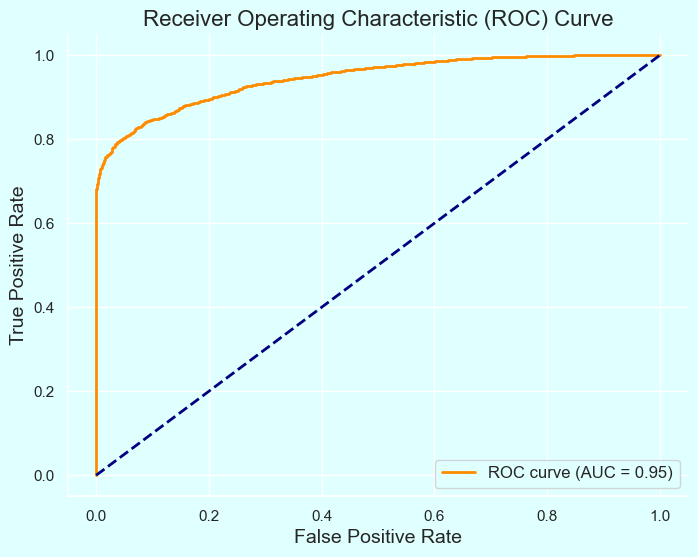

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Assuming clf is your trained classifier
# and train_classifier is a function that trains and returns the trained classifier
clf = LGBMClassifier()  # or whichever classifier you are using

# Train the classifier (replace this with your actual training code)
current_accuracy, current_precision, current_recall, current_specificity = train_classifier(clf, X_new, y_train, X_new_test, y_test)

# Get the predicted probabilities for the positive class
y_pred_prob = clf.predict_proba(X_new_test)[:, 1]

# Calculate the FPR and TPR for the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve with Seaborn styling
#sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

# Plotting the diagonal line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Seaborn styling
sns.despine()
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)

# Show plot
plt.show()
